In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

In [2]:
df=pd.read_csv('car_sales.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
df.shape

(93, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

# Checking for null values

In [8]:
df.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

# Now Treating each and every column accordingly

In [9]:
#Manually treating the type column

In [10]:
df['Type'].unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [11]:
df['Type'].replace({'Small':0,'Compact':1,'Sporty':2,'Van':3,'Midsize':4,'Large':5},inplace=True)

In [12]:
#Dropping Minimum price and maximum price 

In [13]:
df.drop(['Min.Price','Max.Price'],axis=1,inplace=True)

In [14]:
# Airbags

In [15]:
df['AirBags'].value_counts()

Driver only           43
None                  34
Driver & Passenger    16
Name: AirBags, dtype: int64

In [16]:
df['AirBags']

0                   None
1     Driver & Passenger
2            Driver only
3     Driver & Passenger
4            Driver only
             ...        
88                  None
89                  None
90                  None
91           Driver only
92    Driver & Passenger
Name: AirBags, Length: 93, dtype: object

In [17]:
df['AirBags'].replace({"None":0,"Driver only":1,"Driver & Passenger":2},inplace=True)

In [18]:
# Drive-Train

In [19]:
df['DriveTrain'].unique()

array(['Front', 'Rear', '4WD'], dtype=object)

In [20]:
df['DriveTrain'].replace({'Front':0,'Rear':1,'4WD':2},inplace=True)

In [21]:
#MPG highway

In [22]:
df['MPG.highway'].mean()

29.086021505376344

In [23]:
df['MPG.city'].mean()

22.365591397849464

In [24]:
# Using get dummies for the number of cylinders column

In [25]:
df['Cylinders'].unique()

array(['4', '6', '8', '3', 'rotary', '5'], dtype=object)

In [26]:
Data_cylinder=pd.get_dummies(df['Cylinders'],drop_first=True)

In [27]:
Data_cylinder

,4,5,6,8,rotary
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
88,0,1,0,0,0
89,1,0,0,0,0
90,0,0,1,0,0
91,1,0,0,0,0


In [28]:
# Concatinating it with original data

In [29]:
df=pd.concat([df,Data_cylinder],axis=1)

In [30]:
df=df.drop('Cylinders',axis=1)

In [31]:
#Man.trans.avail

In [32]:
df['Man.trans.avail'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df['Man.trans.avail']=df['Man.trans.avail'].replace({'No':0,'Yes':1})

In [34]:
#Rear.Seat.Room
# As we have two null values, we will fill it by the median

In [35]:
df['Rear.seat.room'].median()

27.5

In [36]:
df['Rear.seat.room'].fillna(df['Rear.seat.room'].median(),inplace=True)

In [37]:
#  Luggage.room

In [38]:
df['Luggage.room'].median()

14.0

In [39]:
df['Luggage.room'].fillna(df['Luggage.room'].median(),inplace=True)

In [40]:
# now that we have got the understanding of each feature we will drop the irrelevants columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     int64  
 3   Price               93 non-null     float64
 4   MPG.city            93 non-null     int64  
 5   MPG.highway         93 non-null     int64  
 6   AirBags             93 non-null     int64  
 7   DriveTrain          93 non-null     int64  
 8   EngineSize          93 non-null     float64
 9   Horsepower          93 non-null     int64  
 10  RPM                 93 non-null     int64  
 11  Rev.per.mile        93 non-null     int64  
 12  Man.trans.avail     93 non-null     int64  
 13  Fuel.tank.capacity  93 non-null     float64
 14  Passengers          93 non-null     int64  
 15  Length              93 non-null     int64  
 16  Wheelbase 

In [42]:
df.drop(['Manufacturer','Model','Origin','Make'],axis=1,inplace=True)

In [43]:
df.describe()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,EngineSize,Horsepower,RPM,Rev.per.mile,...,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,4,5,6,8,rotary
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,2.301075,19.509677,22.365591,29.086022,0.806452,0.387097,2.667742,143.827957,5280.645161,2332.204301,...,69.376344,38.956989,27.822581,13.903226,3072.903226,0.526882,0.021505,0.333333,0.075269,0.010753
std,1.767982,9.659430,5.619812,5.331726,0.711063,0.676183,1.037363,52.374410,596.731690,496.506525,...,3.778986,3.223265,2.956795,2.813263,589.896510,0.501983,0.145848,0.473960,0.265255,0.103695
min,0.000000,7.400000,15.000000,20.000000,0.000000,0.000000,1.000000,55.000000,3800.000000,1320.000000,...,60.000000,32.000000,19.000000,6.000000,1695.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,18.000000,26.000000,0.000000,0.000000,1.800000,103.000000,4800.000000,1985.000000,...,67.000000,37.000000,26.000000,12.000000,2620.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,17.700000,21.000000,28.000000,1.000000,0.000000,2.400000,140.000000,5200.000000,2340.000000,...,69.000000,39.000000,27.500000,14.000000,3040.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,23.300000,25.000000,31.000000,1.000000,1.000000,3.300000,170.000000,5750.000000,2565.000000,...,72.000000,41.000000,30.000000,15.000000,3525.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,61.900000,46.000000,50.000000,2.000000,2.000000,5.700000,300.000000,6500.000000,3755.000000,...,78.000000,45.000000,36.000000,22.000000,4105.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Some EDA

In [44]:
Data=pd.read_csv('car_sales.csv')

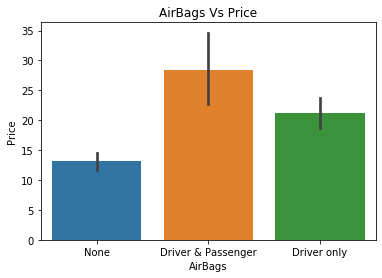

In [45]:
sns.barplot(x='AirBags',y='Price',data=Data)
plt.title('AirBags Vs Price')
plt.show()


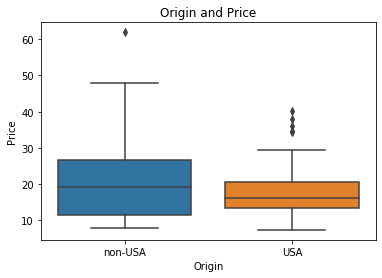

In [46]:
sns.boxplot(x='Origin',y='Price',data=Data)
plt.title('Origin and Price')
plt.show()

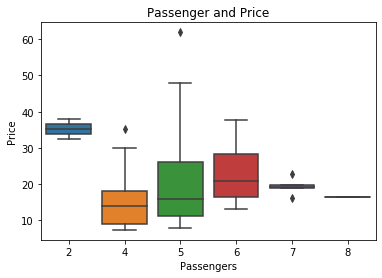

In [47]:
sns.boxplot(x='Passengers',y='Price',data=Data)
plt.title('Passenger and Price')
plt.show()

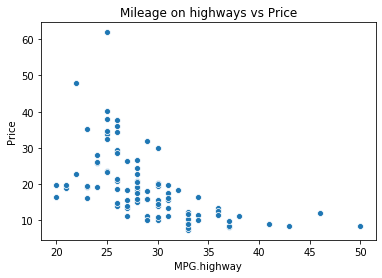

In [48]:
sns.scatterplot(x='MPG.highway',y='Price',data=Data)
plt.title('Mileage on highways vs Price')
plt.show()

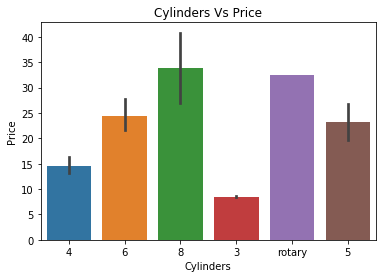

In [49]:
sns.barplot(x='Cylinders',y='Price',data=Data)
plt.title('Cylinders Vs Price')
plt.show()

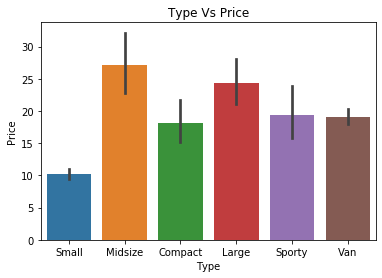

In [50]:
sns.barplot(x='Type',y='Price',data=Data)
plt.title('Type Vs Price')
plt.show()

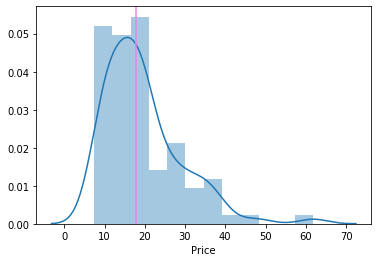

In [51]:
sns.distplot(Data['Price'])
plt.axvline(Data['Price'].median(),color='violet',label='Median')
plt.show()

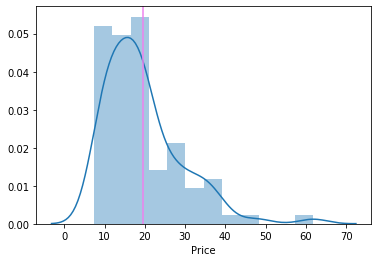

In [52]:
sns.distplot(Data['Price'])
plt.axvline(Data['Price'].mean(),color='violet',label='Mean')
plt.show()

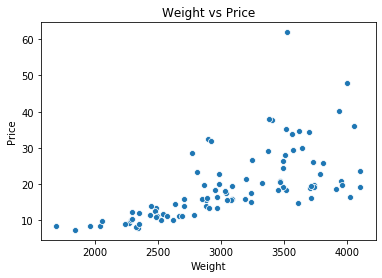

In [53]:
sns.scatterplot(x='Weight',y='Price',data=Data)
plt.title('Weight vs Price')
plt.show()

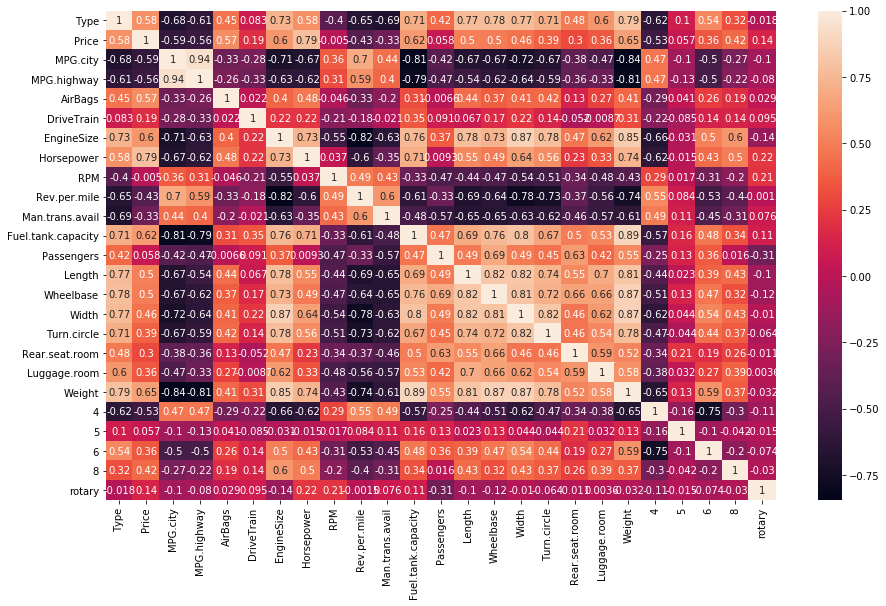

In [54]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Training the model

In [55]:
X=df.drop('Price',axis=1)
y=df.Price.values

In [56]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Checking assumptions for linear regression model


In [75]:
import statsmodels.api as sm

In [76]:
X_constant=sm.add_constant(X)
X_constant

,const,Type,MPG.city,MPG.highway,AirBags,DriveTrain,EngineSize,Horsepower,RPM,Rev.per.mile,...,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,4,5,6,8,rotary
0,1.0,0,25,31,0,0,1.8,140,6300,2890,...,68,37,26.5,11.0,2705,1,0,0,0,0
1,1.0,4,18,25,2,0,3.2,200,5500,2335,...,71,38,30.0,15.0,3560,0,0,1,0,0
2,1.0,1,20,26,1,0,2.8,172,5500,2280,...,67,37,28.0,14.0,3375,0,0,1,0,0
3,1.0,4,19,26,2,0,2.8,172,5500,2535,...,70,37,31.0,17.0,3405,0,0,1,0,0
4,1.0,4,22,30,1,1,3.5,208,5700,2545,...,69,39,27.0,13.0,3640,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.0,3,17,21,0,0,2.5,109,4500,2915,...,72,38,34.0,14.0,3960,0,1,0,0,0
89,1.0,1,21,30,0,0,2.0,134,5800,2685,...,67,35,31.5,14.0,2985,1,0,0,0,0
90,1.0,2,18,25,0,0,2.8,178,5800,2385,...,66,36,26.0,15.0,2810,0,0,1,0,0
91,1.0,1,21,28,1,1,2.3,114,5400,2215,...,67,37,29.5,14.0,2985,1,0,0,0,0


In [77]:
model=sm.OLS(y,X_constant).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     12.36
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.82e-16
Time:                        15:02:32   Log-Likelihood:                -264.30
No. Observations:                  93   AIC:                             578.6
Df Residuals:                      68   BIC:                             641.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 94.5770     29.569      3.199      0.002      35.573     153.581
Type                   0.4714      0.678      0.695      0.489      -0.881       1.824
MPG.city              -0.1666      0.414     -0.403      0.689      -0.993       0.659
MPG.highway           -0.1178      0.401     -0.294      0.770      -0.918       0.682
AirBags                3.9432      0.934      4.220      0.000       2.079       5.808
DriveTrain            -0.0158      1.025     -0.015      0.988      -2.060       2.029
EngineSize            -0.6226      2.546     -0.245      0.808      -5.703       4.458
Horsepower             0.1148      0.042      2.742      0.008       0.031       0.198
RPM                   -0.0024      0.002     -1.154      0.253      -0.007       0.002
Rev.per.mile           0.0020      0.002      0.868      0.388      -0.003       0.007
Man.trans.avail       -1.7972      2.100     -0.856      0.395      -5.988       2.394
Fuel.tank.capacity     0.5893      0.457      1.291      0.201      -0.322       1.500
Passengers            -1.2456      1.283     -0.971      0.335      -3.805       1.314
Length                 0.0360      0.089      0.406      0.686      -0.141       0.213
Wheelbase              0.3638      0.237      1.535      0.129      -0.109       0.837
Width                 -1.5288      0.425     -3.599      0.001      -2.376      -0.681
Turn.circle           -0.7527      0.323     -2.334      0.023      -1.396      -0.109
Rear.seat.room         0.2268      0.316      0.719      0.475      -0.403       0.857
Luggage.room           0.0383      0.314      0.122      0.903      -0.588       0.665
Weight                 0.0009      0.005      0.182      0.856      -0.009       0.010
4                     -0.7905      4.355     -0.182      0.856      -9.480       7.899
5                     -1.2924      6.402     -0.202      0.841     -14.067      11.482
6                      1.6194      5.361      0.302      0.763      -9.077      12.316
8                      5.5262      6.431      0.859      0.393      -7.306      18.359
rotary                -2.7444     10.301     -0.266      0.791     -23.300      17.811
==============================================================================
Omnibus:                       32.312   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.025
Skew:                           1.021   Prob(JB):                     3.18e-27
Kurtosis:                       8.227   Cond. No.                     3.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+05. This might indicate that 

# Auto-Correlation

In [ ]:
# As we could see here the the value of DURBIN-WATSON is close to 2 , this mean this data has approximately no auto-correlatin

In [80]:
import statsmodels.tsa.api as smt

C:\Users\sidko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


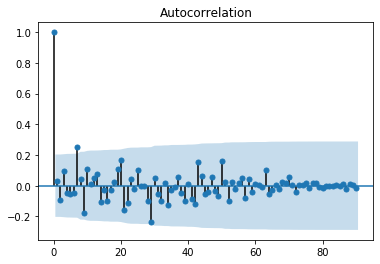

In [84]:
smt.graphics.plot_acf(model.resid,lags=90).show()

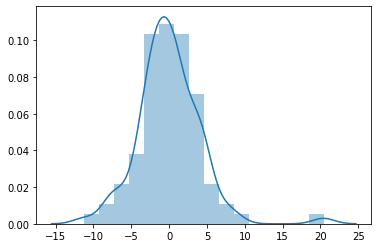

In [86]:
sns.distplot(model.resid)
plt.show()

# Test of normality

In [90]:
#Null Hypopthesis - Data is normal
#Alternate - Data is not normal

In [88]:
from scipy.stats import jarque_bera

In [89]:
jarque_bera(model.resid)

(122.02466826904391, 0.0)

In [ ]:
# We Reject the null hypothesis and state that Data is not normal

# Test of Linearity 

In [93]:
model.resid.mean()

-1.6302371639011977e-14

In [ ]:
# As the mean of the residuals is close to zero we could say that data is linear

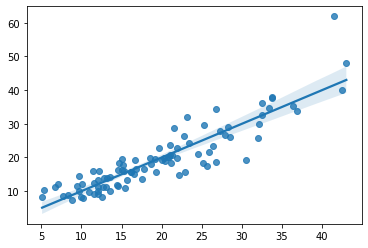

In [95]:
sns.regplot(model.predict(X_constant),y)
plt.show()

In [ ]:
#One other Method to check the linearity is Rainbow method

In [96]:
#h0: Data is Linear
#h1: Data is not linear

In [99]:
fstat,pvalue=sm.stats.diagnostic.linear_rainbow(model)

In [100]:
fstat,pvalue

(0.37103468569852543, 0.9978235276852258)

In [101]:
# the p-value is close to hone we accept of null hypothesis and state that the data is linear

#  Heteroskedasticity and Homoskedasticity

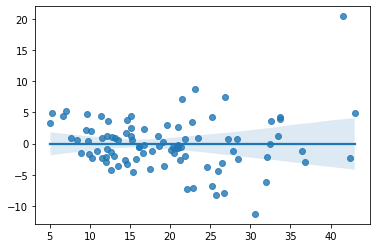

In [102]:
sns.regplot(model.predict(X_constant),model.resid)
plt.show()

In [ ]:
# We will use goldfeld test

In [ ]:
#H0 : Data is Homoskedasticit
#H1 : Data is Heteroskedasticit

In [104]:
import statsmodels.stats.api as sms


In [105]:
fstat,pvalue=sms.het_goldfeldquandt (model.resid,model.model.exog) 

(2.045437675592818, 0.04911775973858711, 'increasing')

In [ ]:
#As the pvalues is less than 5% or 0.05 we will reject the null hypothesis and accept the alternate that errors are heteriskedasticit 

# Multicollinearity 

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#VIF- it tells us about the variance quotient in the model in which we have multiple features.(Variance inflation factor)

In [108]:
VIF=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
VIF

[3452.9322820650714,
 5.610760726774677,
 21.136216369430812,
 17.84395517816479,
 1.7247688183337098,
 1.8753644991140017,
 27.25129995811984,
 18.782271192227633,
 6.260149095996819,
 5.016436393576953,
 3.931671927498837,
 8.759765450218238,
 6.936787182869171,
 6.573555433937141,
 10.207644131456004,
 10.068052191165247,
 4.222291794639734,
 3.402533212369019,
 3.0454615315020517,
 29.910726316955017,
 18.66788531743539,
 3.406036858878383,
 25.218951982918952,
 11.367888181920598,
 4.457713857685479]

In [109]:
# We set the threshold accordingly, in this case we can consider it 5, we can see some features has high multi collinearity

# So there are the 5 assumptions that we need to check for the Linear Regression

# Anyway, we will move ahead and try Linear Regression model and see the results it provides

# Linear Regression

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
train_predict=lr.predict(X_train)
test_predict=lr.predict(X_test)

In [60]:
r2_train_predict=r2_score(y_train,train_predict)
r2_test_predict=r2_score(y_test,test_predict)

In [61]:
print('r2 score for train:',r2_train_predict)
print('r2 score for test:',r2_test_predict)

r2 score for train: 0.8094636995486834
r2 score for test: 0.7325183742409613


In [62]:
# As we could see model is giving quite a good score when using regression, now we will go ahead and use Random forest

# Random Forest

In [63]:
rtree=RandomForestRegressor(random_state=0,n_estimators=150,min_samples_split=4,min_samples_leaf=3)

In [64]:
rtree.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
train_predict=rtree.predict(X_train)
test_predict=rtree.predict(X_test)

In [66]:
r2_train_predict=r2_score(y_train,train_predict)
r2_test_predict=r2_score(y_test,test_predict)

In [67]:
print('r2 score for train:',r2_train_predict)
print('r2 score for test:',r2_test_predict)

r2 score for train: 0.8328604376095272
r2 score for test: 0.7978824740529445


# Additionaly we could hyper-tune the random forest as well

# I have not done feature selection in this case because of very less number of records ,we could have used Wrapper methods like Backward elimination or forward elimation to select the important features.